In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


/tmp/ipykernel_3232371/1214406216.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
/tmp/ipykernel_3232371/1214406216.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
/tmp/ipykernel_3232371/1214406216.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
/tmp/ipykernel_3232371/1214406216.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
/tmp/ipykernel_3232371/1214406216.py:87: UserWarning: set_ticklabels() should only be used with a fi

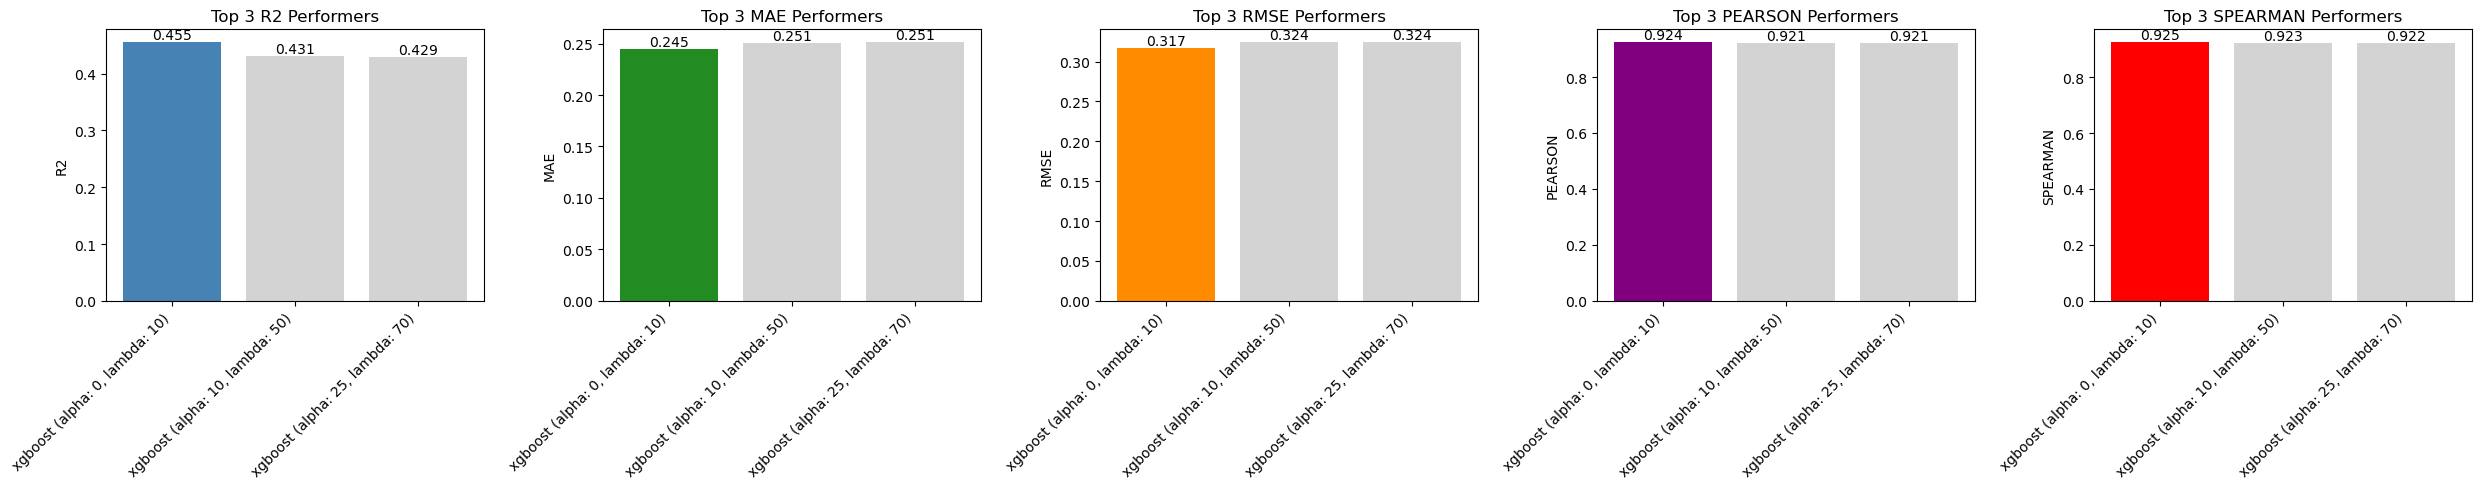

In [2]:
# Select the task for individual method comparison
selected_task = 'top5_spat_msi_full_rna'  # Change this to analyze a different task

# Load the data for the selected task
file_path = os.path.join('/lustre/groups/ml01/workspace/eirini.giannakoulia/no_fs_pipeline/data/reports', selected_task, 'merged_results.tsv')
df = pd.read_csv(file_path, sep='\t')

# Define metrics and their optimization direction
metrics = ['r2', 'mae', 'rmse', 'pearson', 'spearman']
best_direction = {
    'r2': 'max',
    'mae': 'min',
    'rmse': 'min',
    'pearson': 'max',
    'spearman': 'max'
}

# Define highlight colors
highlight_colors = {
    'r2': 'steelblue',
    'mae': 'forestgreen',
    'rmse': 'darkorange',
    'pearson': 'purple',
    'spearman': 'red'
}
default_color = 'lightgray'

# Function to create a concise summary of a method and its parameters
def get_method_summary(method_name, method_params):
    try:
        # Convert to a dictionary if it's a string representation.
        if not isinstance(method_params, dict):
            params_dict = eval(method_params)
        else:
            params_dict = method_params
        # Get the first two key-value pairs.
        first_items = list(params_dict.items())[:2]
        params_info = ", ".join([f"{k}: {v}" for k, v in first_items])
        return f"{method_name} ({params_info})"
    except Exception:
        return f"{method_name}"

# Dictionary to store the top 3 performances per metric
top_performers = {}

for metric in metrics:
    if best_direction[metric] == 'max':
        top_indices = df[metric].nlargest(3).index
    else:
        top_indices = df[metric].nsmallest(3).index
    
    top_performers[metric] = df.loc[top_indices, ['method_name', 'method_params', metric]]

# Create a subplot for each metric
num_metrics = len(metrics)
fig, axes = plt.subplots(1, num_metrics, figsize=(5 * num_metrics, 5), squeeze=False)

for i, metric in enumerate(metrics):
    ax = axes[0, i]
    
    # Get top 3 performers
    top_df = top_performers[metric]
    x_labels = [get_method_summary(row['method_name'], row['method_params']) for _, row in top_df.iterrows()]
    y_values = top_df[metric].values
    
    # Determine the overall best value for highlighting
    if best_direction[metric] == 'max':
        overall_best_value = max(y_values)
    else:
        overall_best_value = min(y_values)
    
    # Set colors
    colors = [highlight_colors[metric] if val == overall_best_value else default_color for val in y_values]

    # Plot bars
    bars = ax.bar(x_labels, y_values, color=colors)
    
    # Annotate bars
    for bar, value in zip(bars, y_values):
        ax.text(
            bar.get_x() + bar.get_width() / 2, value, f"{value:.3f}",
            ha='center', va='bottom', fontsize=10
        )

    ax.set_title(f"Top 3 {metric.upper()} Performers")
    ax.set_ylabel(metric.upper())
    ax.set_xticklabels(x_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()
